# Emotional Analysis the Deep Approach

**Introduction**

Brain computer interfaces in todays world are seen a was to extend the human experience and interaction with the world by offering a new pathway for information to flow out of the brain onto computing devices thus augmenting the minds physical capabilities. This is mostly motivated by the need to provide independence to the disabled. Researches ahave long been working on both fronts for the past two decades and have made valuable contributions in both the analytical software and the hardware for these systems. Recently new BCI devices have surfaced which try to bring this technology to real world application including the [Emotiv BCI headset](https://www.emotiv.com/the-science/), which offer a inexpensive option for users.

This cheaper hardware now allows for applications that can truelly affect individuals to be developed.

Also as of recent control tasks have become skewed towards self-autonomy it has become apparent that these systems could benefit from training these systems with the human context in mind [1](https://www.aaai.org/ocs/index.php/SSS/SSS14/paper/download/7725/7734). This is important as the autonomy should understand the decision making capabilities and other limitations of the humans in order to proactively provide the most relevant information given the user’s task or mission context. One area of interest for context in intent is the emotional state of the human intent. This 

**EEG Measurements**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os

%matplotlib inline
csv_path = "./emo_raw_recordings.csv"

# Step 1: Load the data
def load_neural_data(path=csv_path):
    '''Returns the pandas dataframe'''

    if os.path.exists(csv_path) == True:
        return pd.read_csv(csv_path)

    else:
        print("No file to read from")

emo_df = load_neural_data(csv_path)
emo_df.head()

Y    X    F3    F4    P7   FC6    F7    F8    T7    P8   FC5   AF4    T8  \
0  -37  147 -7063  4819  -826 -7582 -4773  2270  -328  3117  5455 -4411 -6177   
1  -37  147 -7063  4819  -826 -7582 -4773  2270  -328  3117  5455 -4411 -6177   
2  -61  133 -7328 -4353  3961  2876  5115 -2369  2119 -5177  2908   773  1670   
3  -61  133 -7328 -4353  3961  2876  5115 -2369  2119 -5177  2908   773  1670   
4  112   23  2874 -1210  7232 -4647  5941  2502  7021 -1972  4210 -3562 -7523   

     02    01   AF3  state  
0  1919  1236  1631      0  
1  1919  1236  1631      0  
2  1895  7089 -3597      0  
3  1895  7089 -3597      0  
4  -319  7373 -5129      0

['Y', 'X', 'F3', 'F4', 'P7', 'FC6', 'F7', 'F8', 'T7', 'P8', 'FC5', 'AF4', 'T8', '02', '01', 'AF3', 'state']
(16, 510)


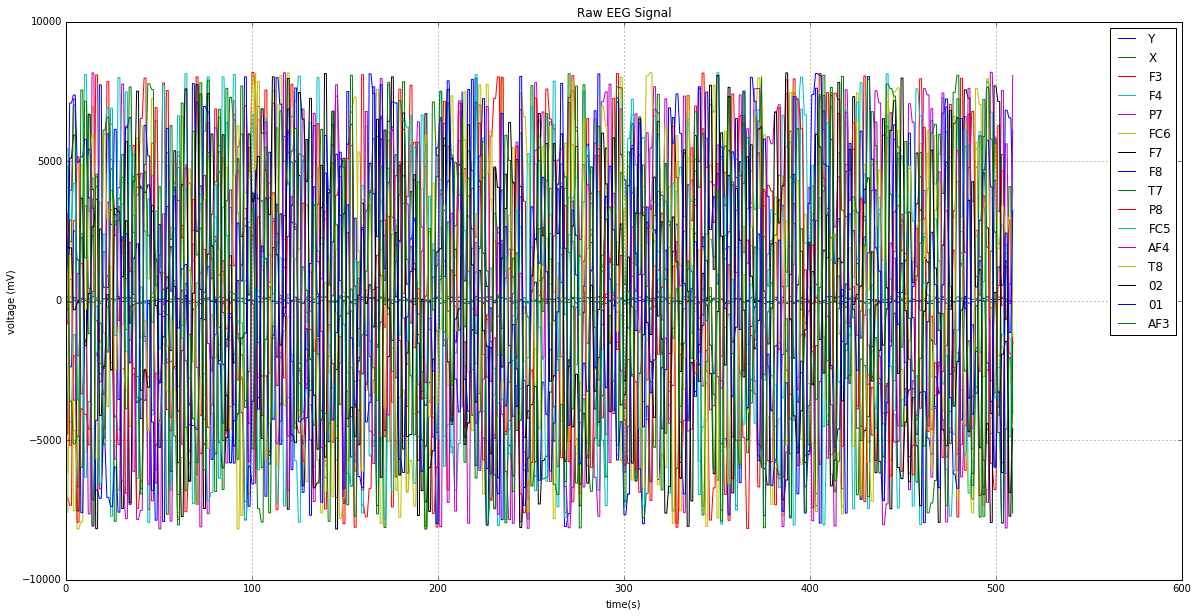

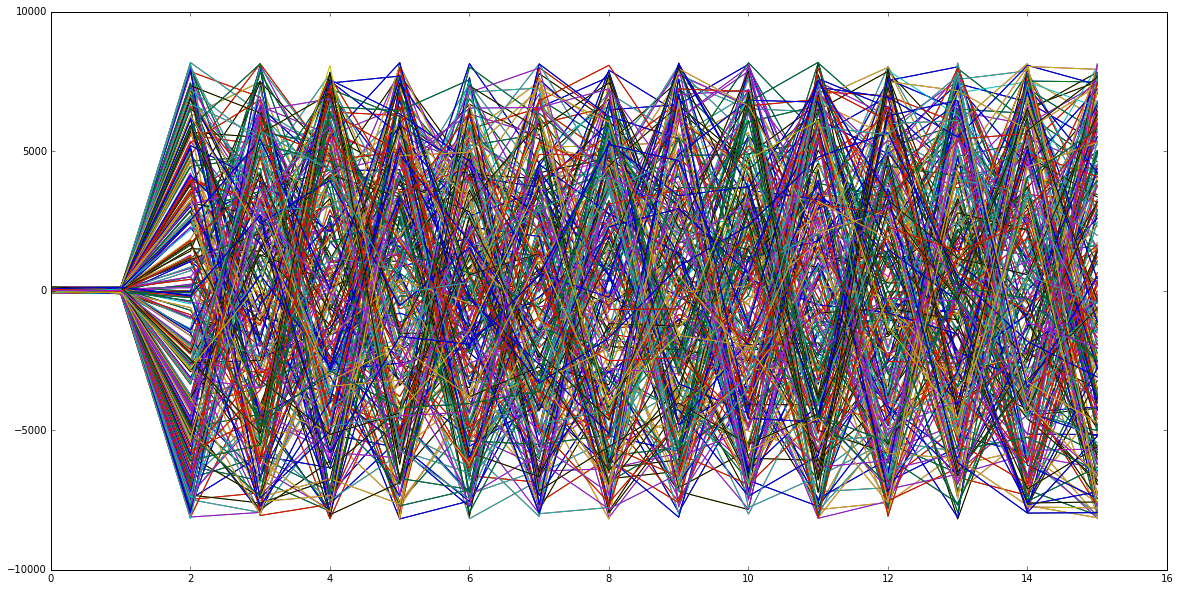

In [3]:
instances = emo_df.shape[0]

# set the sensor values
x = emo_df.ix[:,:-1].values
# align each sensor per row
x = x.T
labels = list(emo_df)
print labels
# extract the table labels
print x.shape
t = np.arange(0.0, instances, 1)
#t = np.arange(0.0, instances, 1)
fig, ax = plt.subplots(figsize=(20,10))
for i in x:
    ax.plot(i)
    ax.hold('on')
    
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.plot(x)

ax.set(xlabel='time(s)', ylabel='voltage (mV)',
       title='Raw EEG Signal')

ax.legend(labels[:-1])

ax.grid()

plt.show()

**Preprocessing**

EEg signals carry with them noise signals. these noise signals are from things like power line  inteferences or other electronic amplifiers (external interferences) and also artifacts (signals originating from anyhere other than the cerebral region of the brain) like Ocular EoG, Muscular EMG and Vascular ECG. These artifacts are the results of muscles reactions in the body like eye blinkin, the movement of the head, shoulders legs and fingers. all these contibute to the unwanted signals in the EEG channels. Artifacts liike eye movements and jaw clenching can be removed using cross-hair fixation point [(2)](Thaler, L., Schütz, A., Goodale, M. and Gegenfurtner, K. 2013 What is the best fixation target? The effect of target shape on stability of fixational eye movements. Vision Research, 76, pp.31-42.). Which maitains the concentration and gaze of the particpant during recordings.

In [8]:
cA = []
cD = []
ts_rec = []
import pywt
for i in x:
    ca, cd = pywt.dwt(i, 'db4')
    cA.append(ca); cD.append(cd)

cat = pywt.thresholding.soft(cA, np.std(cA)/2)
cdt = pywt.thresholding.soft(cD, np.std(cD)/2)

for i, j in zip(cat, cdt):
    ts = pywt.idwt(i, j, 'db4')
    ts_rec.append(ts)

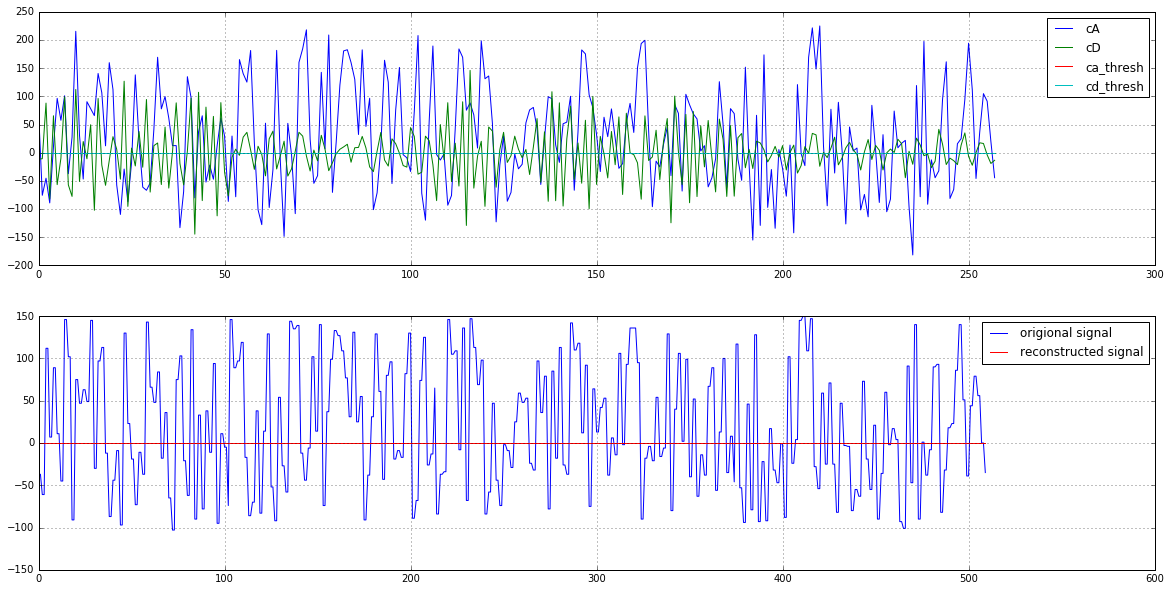

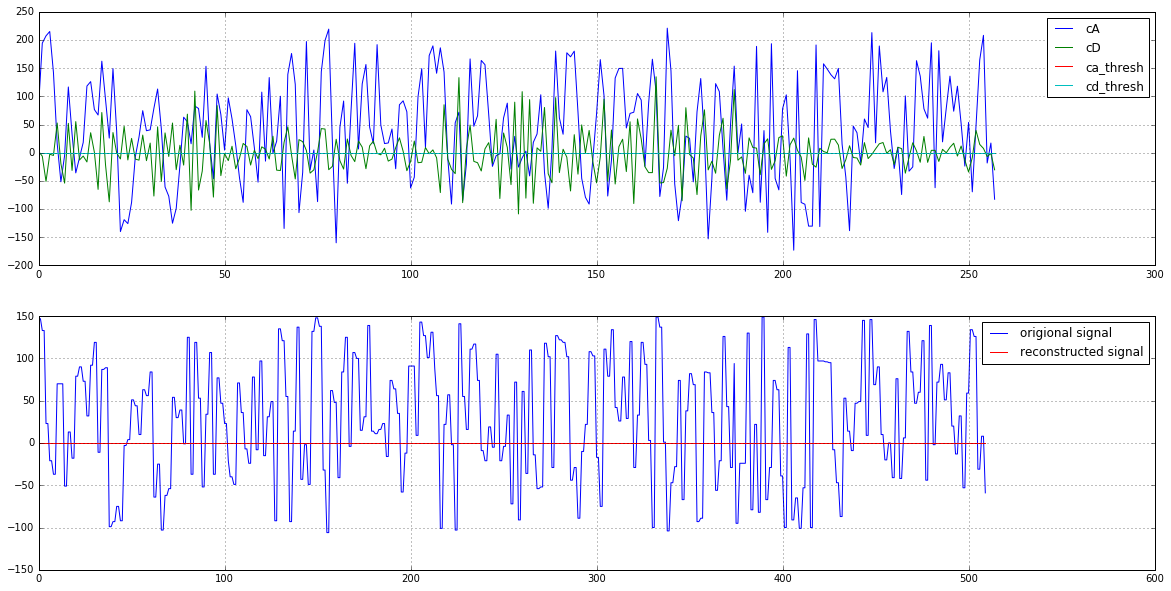

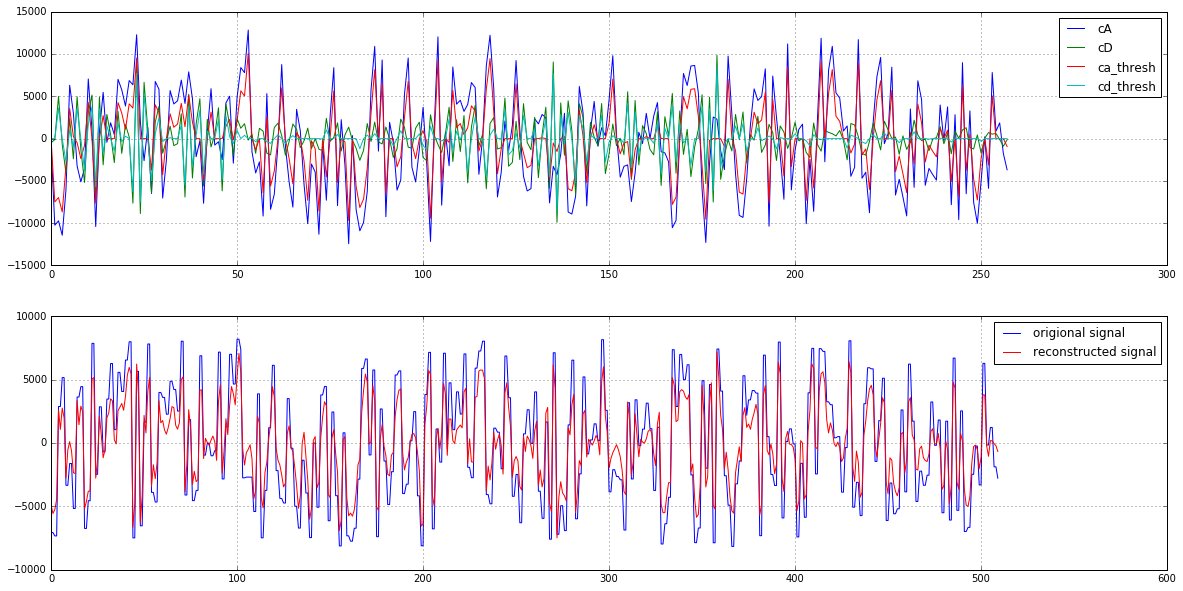

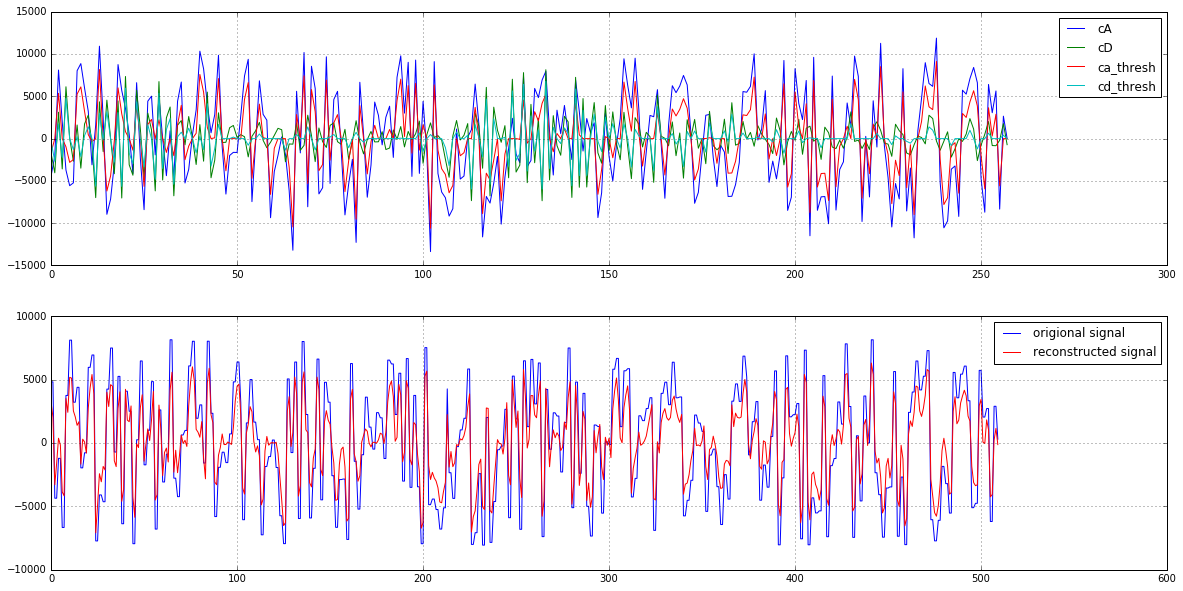

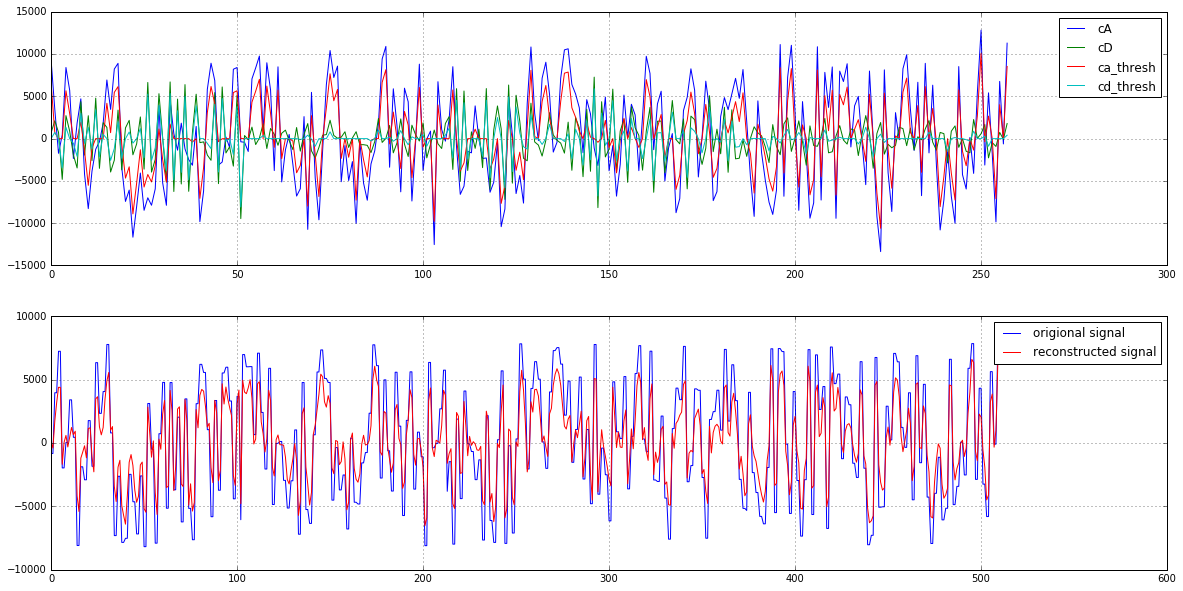

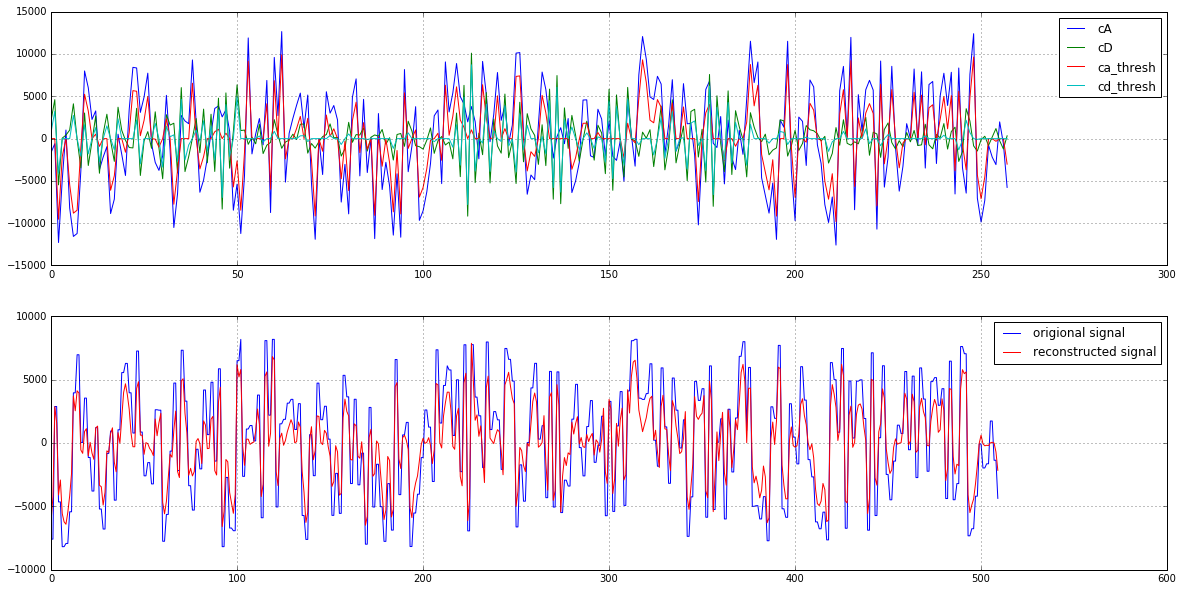

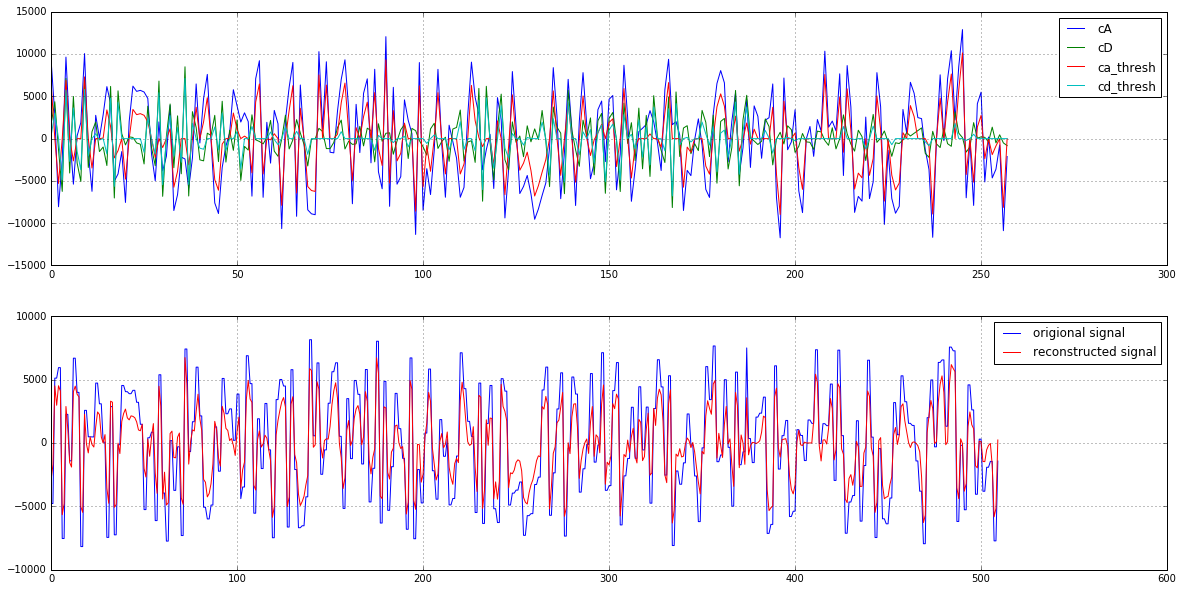

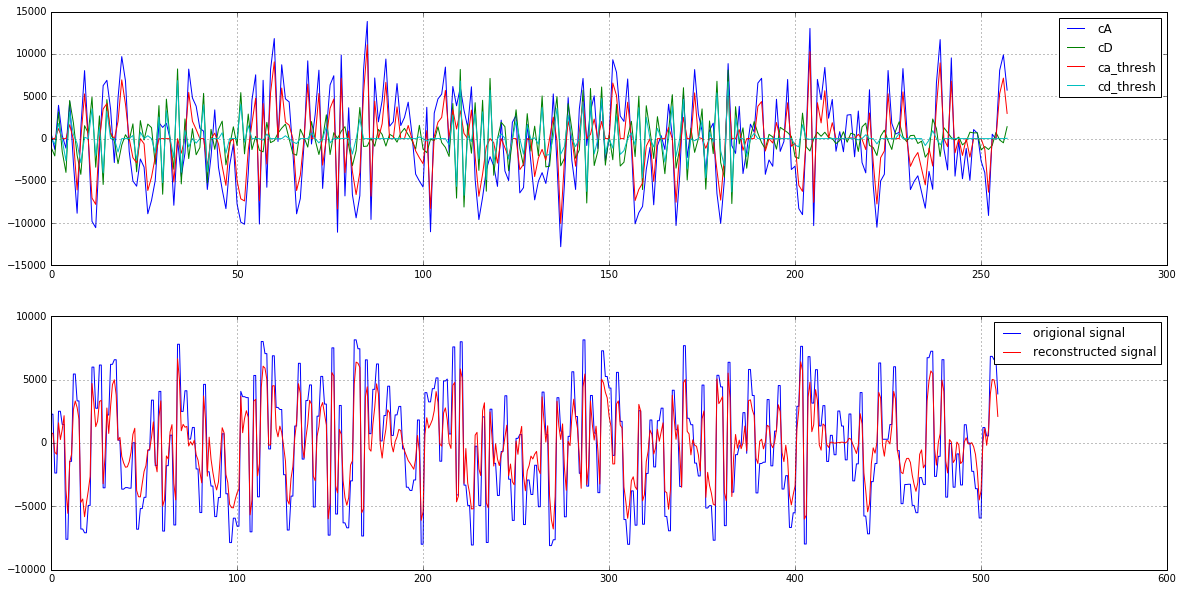

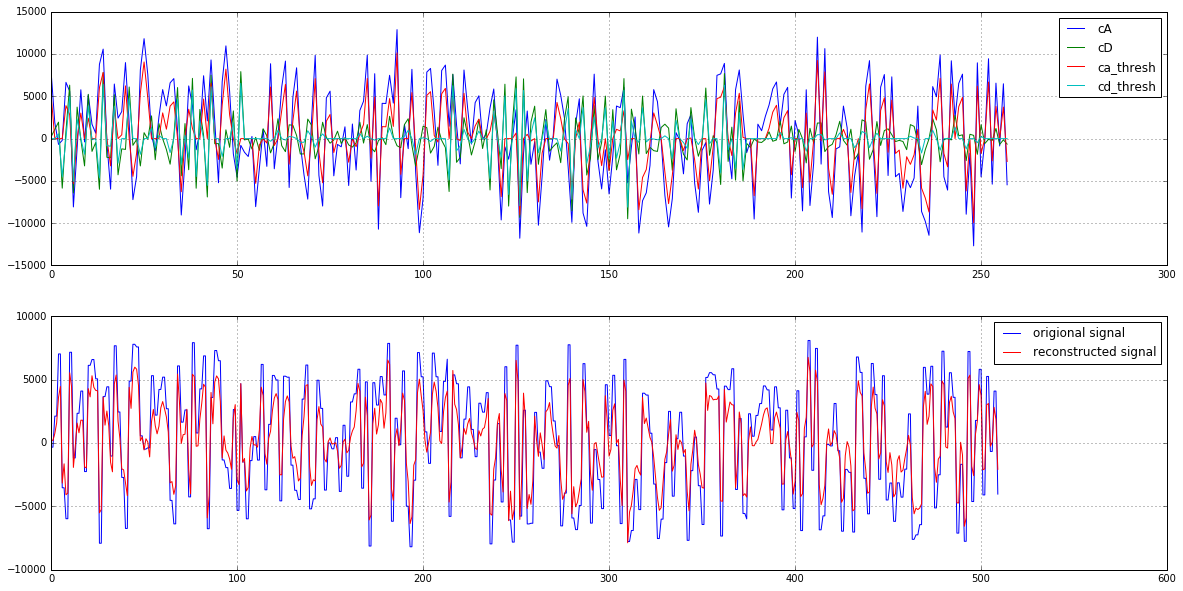

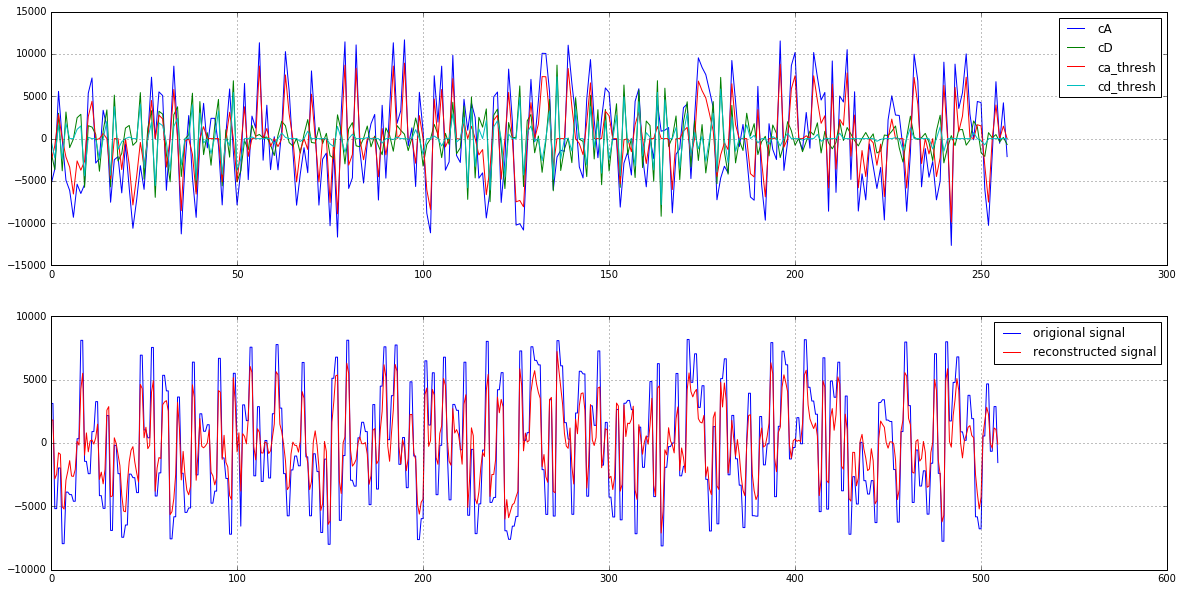

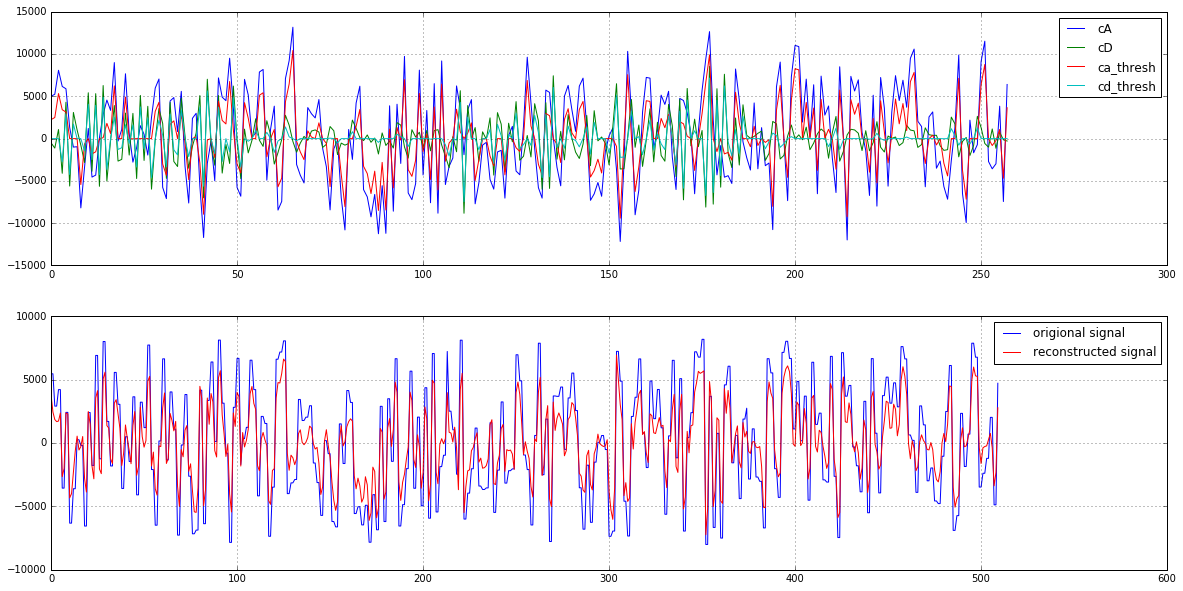

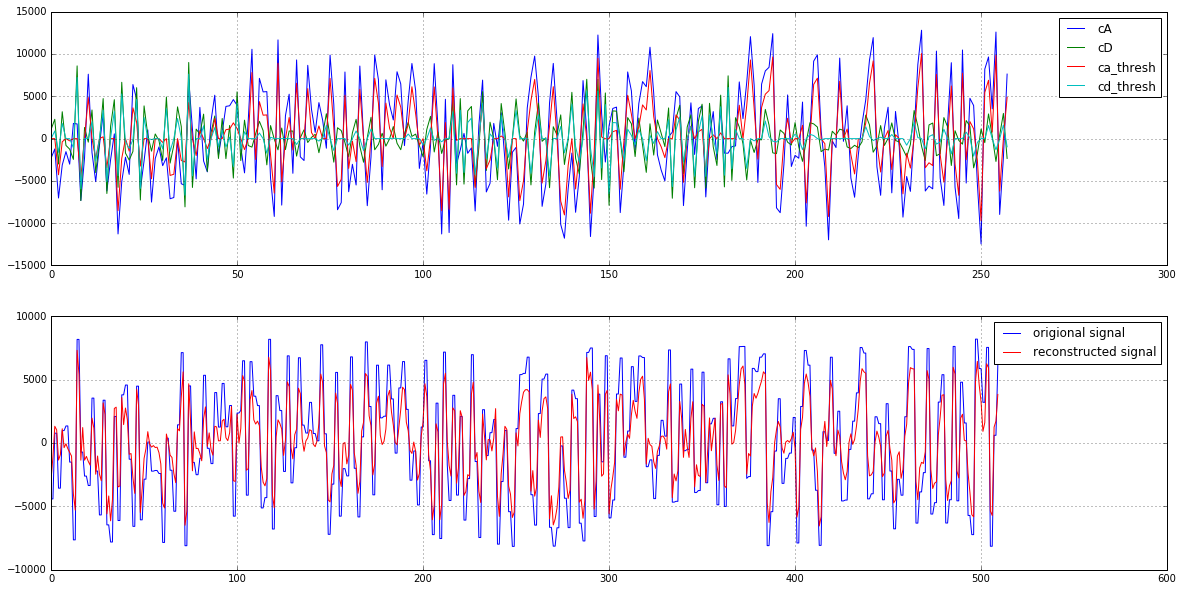

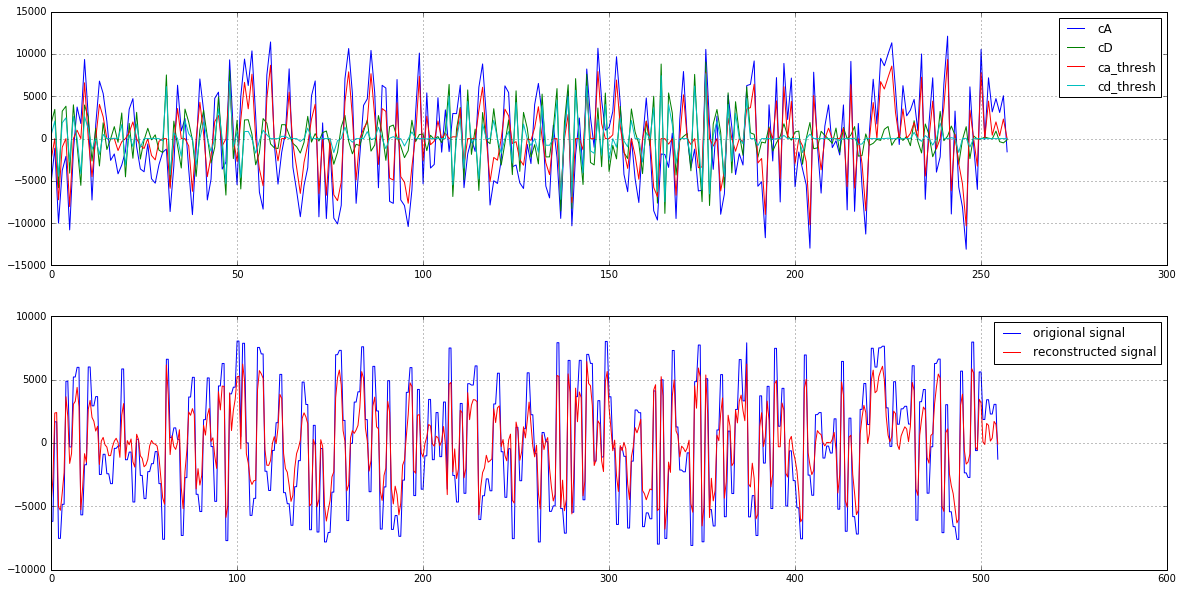

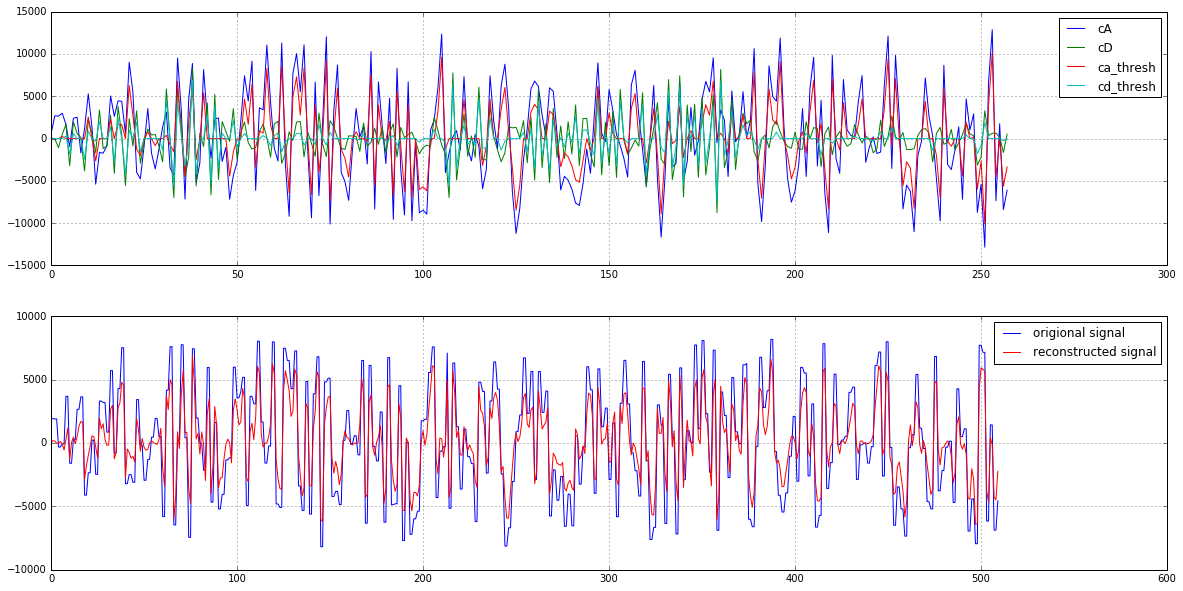

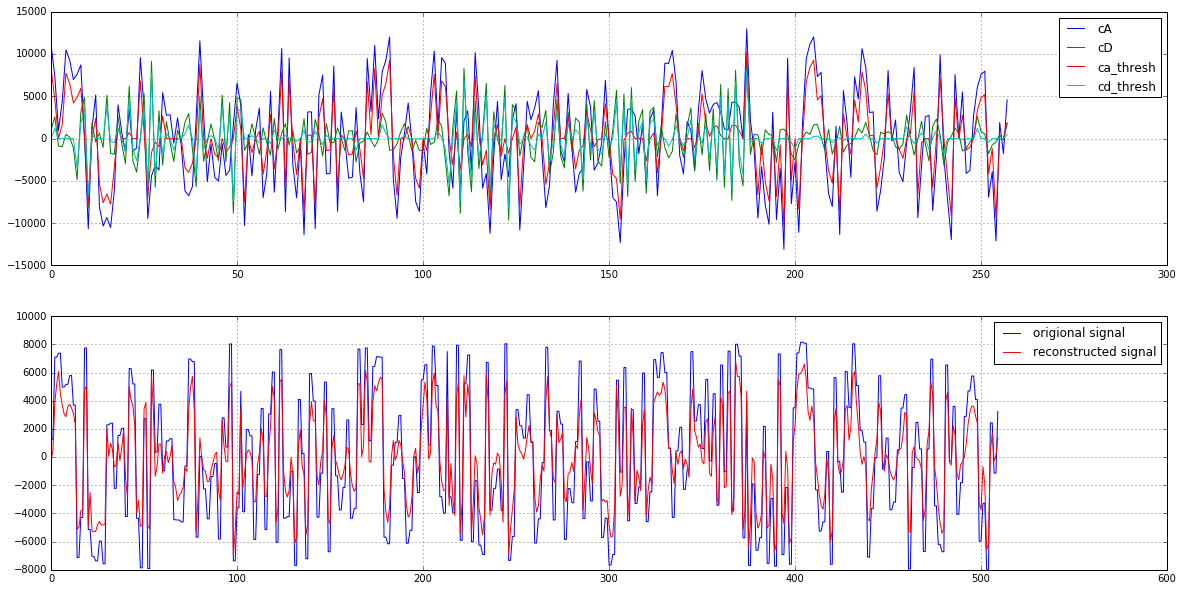

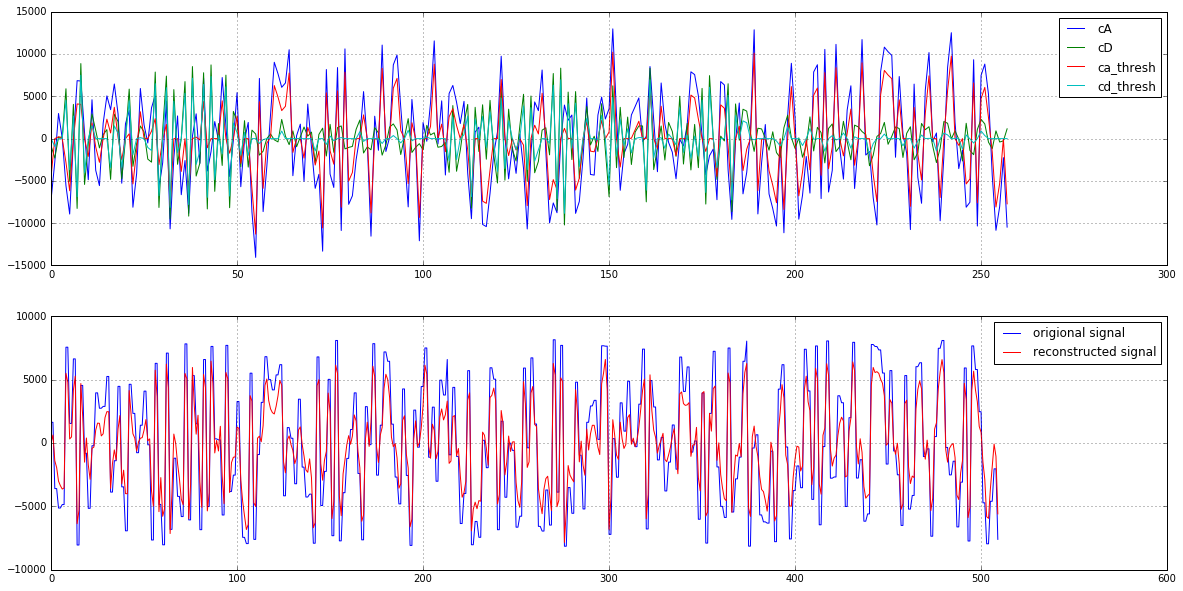

In [5]:
plt.close('all')
for i in range(16):
    plt.subplots(figsize=(20,10))
    
    plt.subplot(211)
    # Origional coefficients        
    plt.plot(cA[i])
    plt.plot(cD[i])
    # Thresholded coefficient
    plt.plot(cat[i])
    plt.plot(cdt[i])
    plt.legend(['cA', 'cD', 'ca_thresh', 'cd_thresh'], loc=0)
    plt.grid('on')
    
    plt.subplot(212)
    plt.plot(x[i])
    plt.hold('on')
    plt.plot(ts_rec[i], 'r')
    plt.legend(['origional signal', 'reconstructed signal'])
    plt.grid('on')
    plt.show()

/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


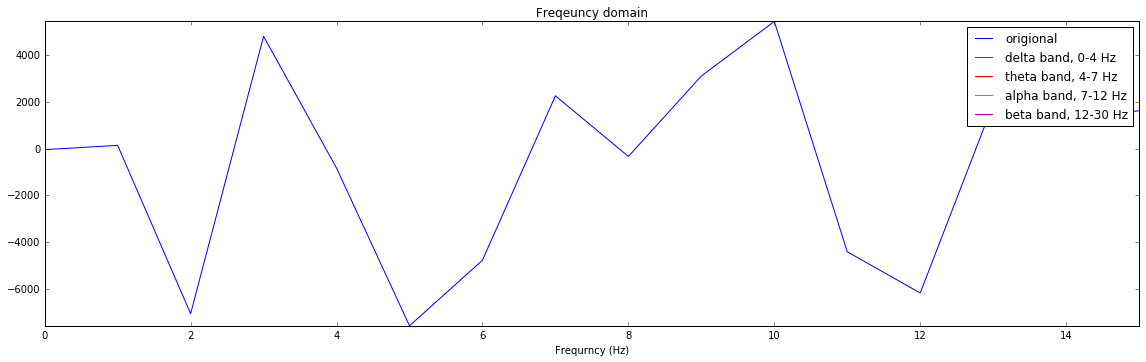

In [6]:
from numpy import *
from scipy.signal import *
from numpy.fft import * 
from matplotlib import *
from scipy import *
from pylab import *

chno = 16 # total number of channels
eeg = []

ch = 1 # channel to study
y = x[:, ch]    # the signal, study channel 'ch'
L = len(y)    # sample rate
fs = 1000.0    # sample time
T = 1/fs    # sample time
t = linspace(1,L,L)*T    # time vector

f = fs*linspace(0,L/10,L/10,)/L    # single site frequency vector, real frequency up  to fs/2
Y = fft(y)

figure()
filtered = []
b = []    # store filter coefficient
cutoff = [0.5,4.0,7.0,12.0,30.0]

for band in xrange(0, len(cutoff)-1):
    wl = 2*cutoff[band]/fs*pi
    wh = 2*cutoff[band+1]/fs*pi
    M = 512    # set the numer of weights 
    bn = zeros(M)
    
    for i in xrange(0, M):    #generate band pass weighting function
        n = i - M/2    # Make symmetrical
        if n == 0:
            bn[i] = wh/pi - wl/pi
        else:
            bn[i] = (sin(wh*n))/(pi*n) - (sin(wl*n))/(pi*n)   # Filter impulse response
    
    bn = bn*kaiser(M,5.2)    # apply kasier window, alpha=5.2
    b.append(bn)
    
    [w,h] = freqz(bn,1)
    filtered.append(convolve(bn, y))     #filter the signal by convolving the signalwith filter cofficients
    
figure(figsize=[16, 10])
subplot(2, 1, 1)
plot(y)
for i in xrange(0, len(filtered)):
    Y = filtered[i]
    Y = fft(Y[M/2:L+M/2])
    plot(f,abs(Y[0:L/10]))
axis('tight')
legend(['origional', 'delta band, 0-4 Hz', 'theta band, 4-7 Hz', 'alpha band, 7-12 Hz', 'beta band, 12-30 Hz'])

for i in xrange(0, len(filtered)): #plot filter's frequency response
    H = abs(fft(b[i], L))
    H = H*1.2*(max(Y)/max(H))
    plot(f, 3*H[0:L/10], 'k')
axis('tight')
title('Freqeuncy domain')
xlabel('Frequrncy (Hz)')
subplots_adjust(left=0.04, bottom=0.04, right=0.99, top=0.97)
savefig('filtered.png')